In [1]:
import pandas as pd
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [5]:
file = '../DATA/subwaytime.csv'

#### 시간대별 지하철 이용 인원 수 <hr>

In [9]:
result = []
# total_number = 0
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    for row in data:
        row[4:] = map(int, row[4:])
        # total_number += row[4]
        result.append(row[4])

print(f'총 지하철 역의 수 : {len(result)}개, '
      f'새벽 4시 승차인원 : {sum(result)}명')

총 지하철 역의 수 : 621개, 새벽 4시 승차인원 : 133185명


#### 새벽4시 지하철 이용 인원 수 (그래프) <hr>

새벽 4시 승차 인원 수 : 133,185명
최대 승차역 : 구로, 인원수 : 10,986명


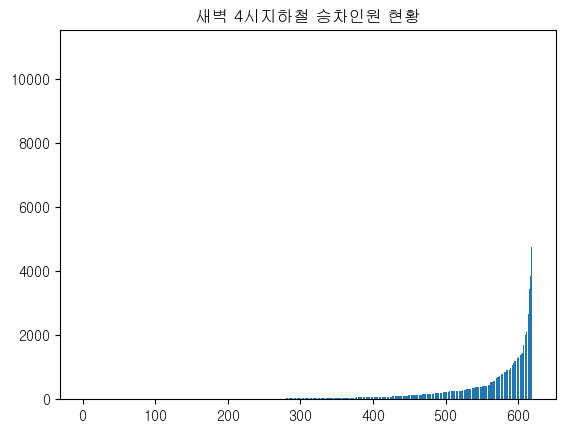

In [11]:
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    # total_number = 0
    max_num = -1
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        # total_number += row[4]
        result.append(row[4])
        if row[4] > max_num:
            max_num = row[4]
            max_station = row[3]

print('새벽 4시 승차 인원 수 : {0:,}명'.format(sum(result)))
print('최대 승차역 : {0}, 인원수 : {1:,}명'.format(max_station, max_num))
result.sort()
plt.figure(dpi = 100)
plt.bar(range(len(result)), result)
plt.title('새벽 4시지하철 승차인원 현황')
plt.show()

#### 출근 시간대 지하철 이용 현황 <hr>

최대 승차 인원역 : 신림(2호선) 576,994명


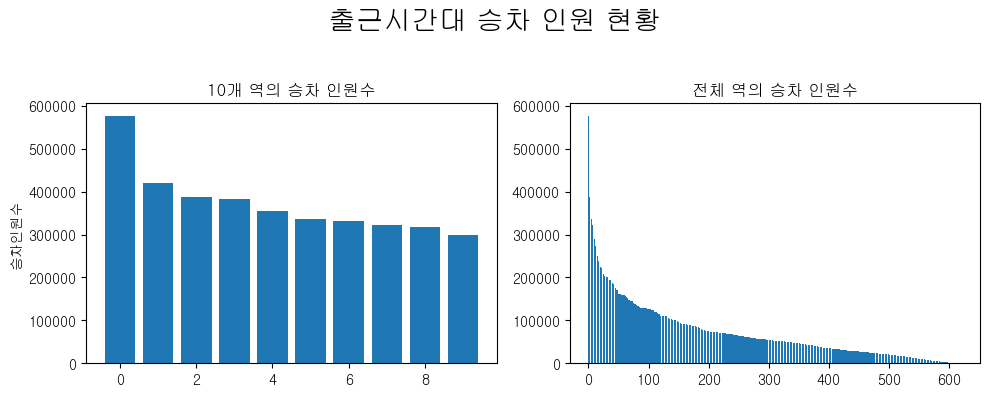

In [15]:
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    # total_number = 0
    max_num = -1
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])
        # row_sum = row[10] + row[12] + row[14]
        result.append(row_sum)
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] + '(' + row[1] + ')'

print(f'최대 승차 인원역 : {max_station} {max_num:,}명')
result.sort(reverse = True)

# 1행, 2열의 그래프 그리기
plt.figure(figsize = (10, 4))
ax1 = plt.subplot(1, 2, 1)
plt.title('10개 역의 승차 인원수', size = 12)
plt.bar(range(10), result[:10])
plt.ylabel('승차인원수')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)
plt.title('전체 역의 승차 인원수', size = 12)
plt.bar(range(len(result)), result)

plt.suptitle('출근시간대 승차 인원 현황\n', size = 20)
plt.tight_layout()
plt.show()

#### 시간대별 가장 많이 승차하는 역 정보 분석 <hr>

[4시 : 구로] : 10,986명
[5시 : 부천] : 36,908명
[6시 : 신림] : 64,151명
[7시 : 신림] : 168,672명
[8시 : 신림] : 250,796명
[9시 : 신림] : 157,526명
[10시 : 신림] : 94,494명
[11시 : 잠실(송파구청)] : 92,035명
[12시 : 잠실(송파구청)] : 103,606명
[13시 : 잠실(송파구청)] : 116,176명
[14시 : 잠실(송파구청)] : 135,787명
[15시 : 잠실(송파구청)] : 166,370명
[16시 : 잠실(송파구청)] : 195,705명
[17시 : 강남] : 246,610명
[18시 : 삼성(무역센터)] : 298,236명
[19시 : 강남] : 200,483명
[20시 : 잠실(송파구청)] : 209,945명
[21시 : 홍대입구] : 216,017명
[22시 : 홍대입구] : 212,376명
[23시 : 홍대입구] : 110,986명
[0시 : 강남] : 16,352명
[1시 : 종각] : 1,638명
[2시 : 시청] : 13명


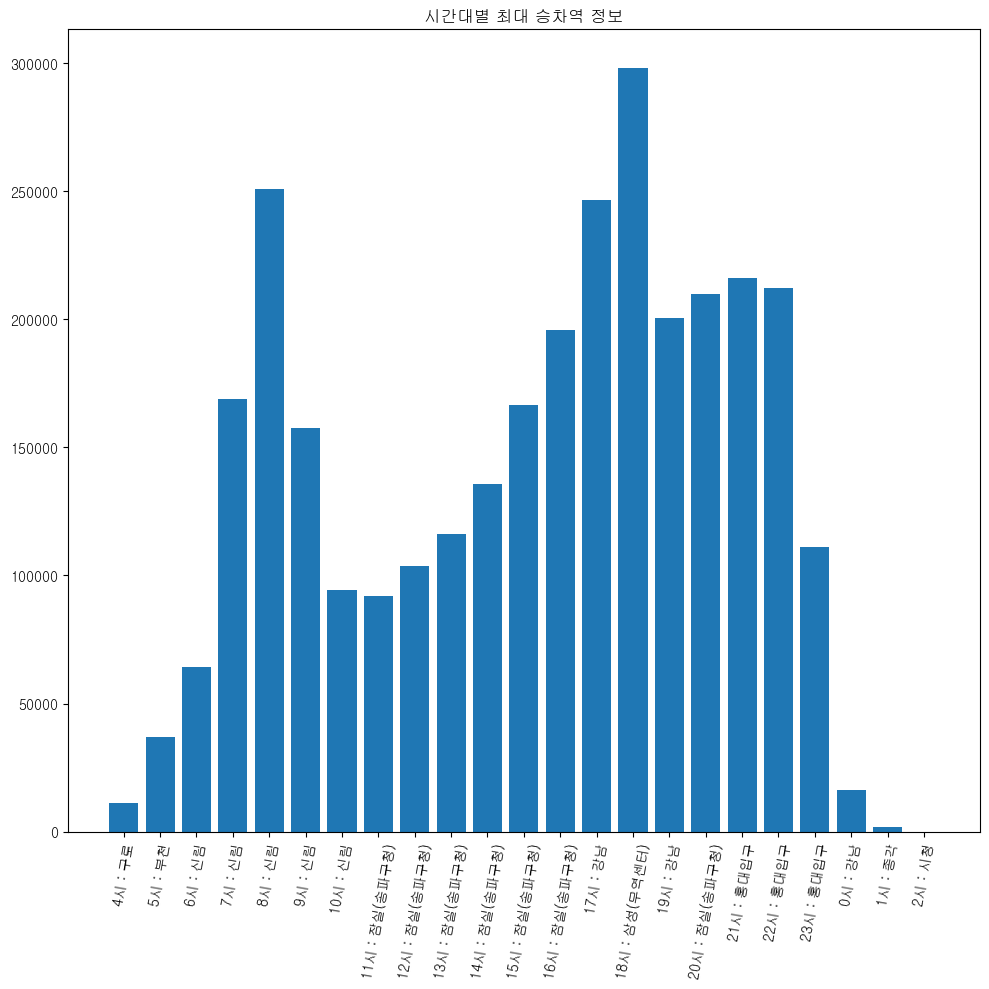

In [20]:
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    max = [0] * 23
    max_station = [''] * 23
    xtick_list = []

    for i in range(4, 27):
        n = i % 24
        xtick_list.append(str(n))

    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j*2+4]
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시 : ' + row[3]
        
    for i in range(len(max)):
        print(f'[{max_station[i]}] : {max[i]:,}명')

plt.figure(figsize = (10, 10))
plt.title('시간대별 최대 승차역 정보')
plt.bar(range(23), max)
plt.xticks(range(23), labels = max_station, rotation = 80)
plt.tight_layout()
plt.show()

#### 모든 지하철역에서 시간대별 승하차 인원 <hr>

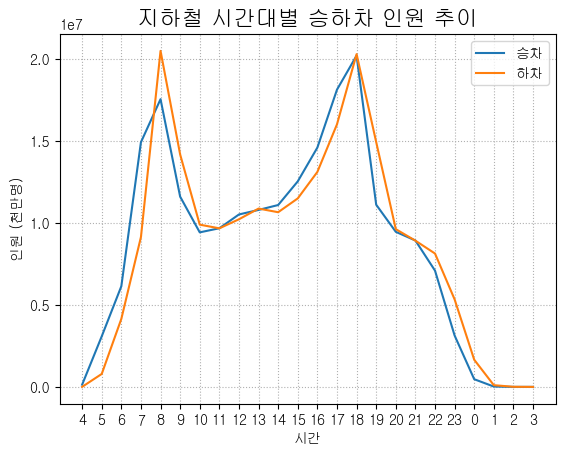

In [19]:
with open(file, encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    subway_in = [0] * 24
    subway_out = [0] * 24

    for row in data:
        row[4:] = map(int, row[4:])
        for i in range(24):
            subway_in[i] += row[4+i*2]
            subway_out[i] += row[5+i*2]

    xtick_list = []
    for i in range(4, 28):
        n = i % 24
        xtick_list.append(str(n))
    
    plt.figure(dpi = 100)
    plt.title('지하철 시간대별 승하차 인원 추이', size = 16)
    plt.grid(linestyle = ':')
    plt.plot(subway_in, label = '승차')
    plt.plot(subway_out, label = '하차')
    plt.legend()

    plt.xticks(range(24), labels = xtick_list)
    plt.xlabel('시간')
    plt.ylabel('인원 (천만명)')
    plt.show()